In [1]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('ite4').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/08 03:59:46 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
disorder = spark.read.csv('disorder.csv', inferSchema=True, header=True) # get disorder data
disorder.printSchema()

root
 |-- index: integer (nullable = true)
 |-- Entity: string (nullable = true)
 |-- Code: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Schizophrenia (%): string (nullable = true)
 |-- Bipolar disorder (%): string (nullable = true)
 |-- Eating disorders (%): string (nullable = true)
 |-- Anxiety disorders (%): double (nullable = true)
 |-- Drug use disorders (%): double (nullable = true)
 |-- Depression (%): double (nullable = true)
 |-- Alcohol use disorders (%): double (nullable = true)



In [3]:
disorder.show()

+-----+-----------+----+----+-----------------+--------------------+--------------------+---------------------+----------------------+--------------+-------------------------+
|index|     Entity|Code|Year|Schizophrenia (%)|Bipolar disorder (%)|Eating disorders (%)|Anxiety disorders (%)|Drug use disorders (%)|Depression (%)|Alcohol use disorders (%)|
+-----+-----------+----+----+-----------------+--------------------+--------------------+---------------------+----------------------+--------------+-------------------------+
|    0|Afghanistan| AFG|1990|          0.16056|            0.697779|            0.101855|              4.82883|              1.677082|      4.071831|                 0.672404|
|    1|Afghanistan| AFG|1991|         0.160312|            0.697961|            0.099313|              4.82974|              1.684746|      4.079531|                 0.671768|
|    2|Afghanistan| AFG|1992|         0.160135|            0.698107|            0.096692|             4.831108|         

In [4]:
demo = spark.read.csv('demographic.csv', inferSchema=True, header=True)  # get demographic data
demo.printSchema()

root
 |-- country: string (nullable = true)
 |-- date: integer (nullable = true)
 |-- GNP per Capita: double (nullable = true)
 |-- Inflation: double (nullable = true)
 |-- Industry: double (nullable = true)
 |-- life_expectancy: double (nullable = true)
 |-- Total_Fertility_Rate: double (nullable = true)
 |-- Population: double (nullable = true)
 |-- Migration: double (nullable = true)
 |-- Political_stability: double (nullable = true)
 |-- c_codes: string (nullable = true)



In [5]:
demo.show()

+-----------+----+--------------+---------+--------+------------------+--------------------+-----------+----------+-------------------+-------+
|    country|date|GNP per Capita|Inflation|Industry|   life_expectancy|Total_Fertility_Rate| Population| Migration|Political_stability|c_codes|
+-----------+----+--------------+---------+--------+------------------+--------------------+-----------+----------+-------------------+-------+
|AFGHANISTAN|1960|          null|     null|    null|            32.292|                7.45|  8996351.0|      null|               null|    AFG|
|AFGHANISTAN|1961|          null|     null|    null|            32.742|                7.45|  9166764.0|      null|               null|    AFG|
|AFGHANISTAN|1962|          null|     null|    null|            33.185|                7.45|  9345868.0|  -20000.0|               null|    AFG|
|AFGHANISTAN|1963|          null|     null|    null|            33.624|                7.45|  9533954.0|      null|               null| 

In [6]:
happy = spark.read.csv('happiness.csv', inferSchema=True, header=True)  # get happiness data
happy.printSchema()

root
 |-- Country Name: string (nullable = true)
 |-- Regional Indicator: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Life Ladder: double (nullable = true)
 |-- Log GDP Per Capita: double (nullable = true)
 |-- Social Support: double (nullable = true)
 |-- Healthy Life Expectancy At Birth: double (nullable = true)
 |-- Freedom To Make Life Choices: double (nullable = true)
 |-- Generosity: double (nullable = true)
 |-- Perceptions Of Corruption: double (nullable = true)
 |-- Positive Affect: double (nullable = true)
 |-- Negative Affect: double (nullable = true)
 |-- Confidence In National Government: double (nullable = true)



In [7]:
happy.show()

+------------+--------------------+----+-----------+------------------+--------------+--------------------------------+----------------------------+------------+-------------------------+---------------+---------------+---------------------------------+
|Country Name|  Regional Indicator|Year|Life Ladder|Log GDP Per Capita|Social Support|Healthy Life Expectancy At Birth|Freedom To Make Life Choices|  Generosity|Perceptions Of Corruption|Positive Affect|Negative Affect|Confidence In National Government|
+------------+--------------------+----+-----------+------------------+--------------+--------------------------------+----------------------------+------------+-------------------------+---------------+---------------+---------------------------------+
| Afghanistan|          South Asia|2008|3.723589897|       7.350416183|   0.450662315|                            50.5|                 0.718114316| 0.167652458|               0.88168633|    0.414297044|     0.25819549|                   

In [8]:
disorder.describe().show()

+-------+------------------+-----------+------+------------------+--------------------+--------------------+--------------------+---------------------+----------------------+------------------+-------------------------+
|summary|             index|     Entity|  Code|              Year|   Schizophrenia (%)|Bipolar disorder (%)|Eating disorders (%)|Anxiety disorders (%)|Drug use disorders (%)|    Depression (%)|Alcohol use disorders (%)|
+-------+------------------+-----------+------+------------------+--------------------+--------------------+--------------------+---------------------+----------------------+------------------+-------------------------+
|  count|            108553|     108553|103141|            108553|               25875|               19406|              100236|                 6468|                  6468|              6468|                     6468|
|   mean|           54276.0|       null|  null|1923.9978415275343|  1101844.3786920486|  1118.3980735172652|2.7903132480

In [9]:
demo.describe().show()

+-------+-----------+------------------+-----------------+------------------+--------------------+------------------+--------------------+--------------------+-----------------+-------------------+-------+
|summary|    country|              date|   GNP per Capita|         Inflation|            Industry|   life_expectancy|Total_Fertility_Rate|          Population|        Migration|Political_stability|c_codes|
+-------+-----------+------------------+-----------------+------------------+--------------------+------------------+--------------------+--------------------+-----------------+-------------------+-------+
|  count|      10734|             10734|             6967|              7653|                1907|              9223|                9239|               10343|             1914|               3237|  10291|
|   mean|       null|1989.2374697223775|7773.675900674609|29.687432789918226| 2.13422294584824E11| 63.61896875927687|   4.091559254248293| 2.621848498888137E7|1566.175026123302

In [10]:
disorder.select('Entity').distinct().count() # get the number of unique countries

276

In [11]:
demo.select('country').distinct().count() # get the number of unique countries

187

In [12]:
happy.select('Country Name').distinct().count() # get the number of unique countries

165

In [13]:
disorder.select('Year').distinct().count() # get the number of unique years

259

In [14]:
disorder.select('Year').describe().show() # get the number of unique years

+-------+------------------+
|summary|              Year|
+-------+------------------+
|  count|            108553|
|   mean|1923.9978415275343|
| stddev| 88.58329364119412|
|    min|                 0|
|    max|              Year|
+-------+------------------+



In [15]:
demo.select('date').distinct().count() # get the number of unique years

59

In [16]:
demo.select('date').describe().show() # get the number of unique years

+-------+------------------+
|summary|              date|
+-------+------------------+
|  count|             10734|
|   mean|1989.2374697223775|
| stddev|17.020169579704802|
|    min|              1960|
|    max|              2018|
+-------+------------------+



In [17]:
happy.select('Year').distinct().count() # get the number of unique years

18

In [18]:
happy.select('Year').describe().show() 

+-------+------------------+
|summary|              Year|
+-------+------------------+
|  count|              2199|
|   mean|2014.1614370168259|
| stddev| 4.718735519608616|
|    min|              2005|
|    max|              2022|
+-------+------------------+



In [19]:
disorder.printSchema()

root
 |-- index: integer (nullable = true)
 |-- Entity: string (nullable = true)
 |-- Code: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Schizophrenia (%): string (nullable = true)
 |-- Bipolar disorder (%): string (nullable = true)
 |-- Eating disorders (%): string (nullable = true)
 |-- Anxiety disorders (%): double (nullable = true)
 |-- Drug use disorders (%): double (nullable = true)
 |-- Depression (%): double (nullable = true)
 |-- Alcohol use disorders (%): double (nullable = true)



In [20]:
disorder = disorder.drop('Bipolar disorder (%)','Eating disorders (%)','Anxiety disorders (%)','Drug use disorders (%)','Depression (%)','Alcohol use disorders (%)')

In [21]:
disorder.printSchema()

root
 |-- index: integer (nullable = true)
 |-- Entity: string (nullable = true)
 |-- Code: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Schizophrenia (%): string (nullable = true)



In [22]:
# drop unwanted features

disorder = disorder.drop('index','Code')
demo = demo.drop('c_codes')
happy = happy.drop('Regional Indicator')

disorder = disorder.withColumnRenamed('Entity', 'Country').withColumnRenamed('Schizophrenia (%)', 'Schizophrenia')
demo = demo.withColumnRenamed('country', 'Country').withColumnRenamed('date', 'Year').withColumnRenamed('GNP per Capita', 'GNP').withColumnRenamed('life_expectancy', 'Life_expectancy').withColumnRenamed('Total_Fertility_Rate', 'Fertility_rate')
happy = happy.withColumnRenamed('Country Name', 'Country').withColumnRenamed('Life Ladder', 'Life_ladder').withColumnRenamed('Log GDP Per Capita', 'GDP').withColumnRenamed('Social Support', 'Social_support').withColumnRenamed('Healthy Life Expectancy At Birth', 'Healthy_life_expectancy').withColumnRenamed('Freedom To Make Life Choices', 'Freedom').withColumnRenamed('Perceptions Of Corruption', 'Corruption').withColumnRenamed('Positive Affect', 'Positive_affect').withColumnRenamed('Negative Affect', 'Negative_affect').withColumnRenamed('Confidence In National Government', 'Confidence_in_government')


In [23]:
disorder.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Schizophrenia: string (nullable = true)



In [24]:
demo.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- GNP: double (nullable = true)
 |-- Inflation: double (nullable = true)
 |-- Industry: double (nullable = true)
 |-- Life_expectancy: double (nullable = true)
 |-- Fertility_rate: double (nullable = true)
 |-- Population: double (nullable = true)
 |-- Migration: double (nullable = true)
 |-- Political_stability: double (nullable = true)



In [25]:
happy.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Life_ladder: double (nullable = true)
 |-- GDP: double (nullable = true)
 |-- Social_support: double (nullable = true)
 |-- Healthy_life_expectancy: double (nullable = true)
 |-- Freedom: double (nullable = true)
 |-- Generosity: double (nullable = true)
 |-- Corruption: double (nullable = true)
 |-- Positive_affect: double (nullable = true)
 |-- Negative_affect: double (nullable = true)
 |-- Confidence_in_government: double (nullable = true)



In [26]:
disorder.summary().show()

+-------+-----------+------------------+--------------------+
|summary|    Country|              Year|       Schizophrenia|
+-------+-----------+------------------+--------------------+
|  count|     108553|            108553|               25875|
|   mean|       null|1923.9978415275343|  1101844.3786920486|
| stddev|       null| 88.58329364119412|   8878369.417451045|
|    min|Afghanistan|                 0|            0.146902|
|    25%|       null|            1867.0|            0.375092|
|    50%|       null|            1936.0|            3.670473|
|    75%|       null|            1992.0|           98.831696|
|    max|   Zimbabwe|              Year|Suicide rate (dea...|
+-------+-----------+------------------+--------------------+



In [27]:
disorder.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Schizophrenia: string (nullable = true)



In [28]:
# remove rows with rate >= 1 & convert to numeric
from pyspark.sql.functions import initcap, col
disorder = disorder.withColumn('Schizophrenia', col('Schizophrenia').cast("double"))
disorder = disorder.filter(col("Schizophrenia") <= 1)
disorder.describe().show()

+-------+-----------+----------------+--------------------+
|summary|    Country|            Year|       Schizophrenia|
+-------+-----------+----------------+--------------------+
|  count|       6468|            6468|                6468|
|   mean|       null|          2003.5| 0.21164355318491077|
| stddev|       null|8.07837172245116|0.044252801301788984|
|    min|Afghanistan|            1990|            0.146902|
|    max|   Zimbabwe|            2017|             0.37511|
+-------+-----------+----------------+--------------------+



In [29]:
disorder.sort("Schizophrenia", ascending=False).show(50)

+-----------+----+-------------+
|    Country|Year|Schizophrenia|
+-----------+----+-------------+
|Netherlands|2006|      0.37511|
|Netherlands|2005|     0.375092|
|Netherlands|2007|     0.375087|
|Netherlands|2008|     0.374991|
|Netherlands|2004|     0.374961|
|Netherlands|2009|     0.374802|
|Netherlands|2003|     0.374665|
|Netherlands|2010|     0.374514|
|Netherlands|2002|     0.374324|
|Netherlands|2001|     0.374019|
|Netherlands|2000|     0.373839|
|Netherlands|2011|     0.373791|
|Netherlands|1999|     0.373747|
|Netherlands|1998|     0.373661|
|Netherlands|1997|     0.373571|
|Netherlands|1996|     0.373494|
|Netherlands|1995|     0.373432|
|Netherlands|1994|     0.373355|
|Netherlands|1993|     0.373262|
|Netherlands|1992|     0.373143|
|Netherlands|1991|     0.373018|
|Netherlands|1990|     0.372879|
|Netherlands|2012|     0.372408|
|Netherlands|2013|     0.370458|
|Netherlands|2014|     0.368015|
|  Australia|2005|     0.367078|
|  Australia|2006|     0.366969|
|  Austral

In [30]:
# convert data in Year column to Initial Capital
demo = demo.select("*", initcap(col('Country'))).drop('Country').withColumnRenamed('initcap(Country)', 'Country')
demo.show()

+----+----+---------+--------+------------------+--------------+-----------+----------+-------------------+-----------+
|Year| GNP|Inflation|Industry|   Life_expectancy|Fertility_rate| Population| Migration|Political_stability|    Country|
+----+----+---------+--------+------------------+--------------+-----------+----------+-------------------+-----------+
|1960|null|     null|    null|            32.292|          7.45|  8996351.0|      null|               null|Afghanistan|
|1961|null|     null|    null|            32.742|          7.45|  9166764.0|      null|               null|Afghanistan|
|1962|null|     null|    null|            33.185|          7.45|  9345868.0|  -20000.0|               null|Afghanistan|
|1963|null|     null|    null|            33.624|          7.45|  9533954.0|      null|               null|Afghanistan|
|1964|null|     null|    null|             34.06|          7.45|  9731361.0|      null|               null|Afghanistan|
|1965|null|     null|    null|          

In [31]:
# remove strings in Year column and convert the column to Integer
from pyspark.sql.functions import regexp_replace, col
from pyspark.sql.types import IntegerType
disorder = disorder.withColumn('Year', regexp_replace(col('Year'), "[a-zA-Z]+", ""))
disorder = disorder.withColumn('Year', col('Year').cast(IntegerType()))
disorder.printSchema()
disorder.show()

root
 |-- Country: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Schizophrenia: double (nullable = true)

+-----------+----+-------------+
|    Country|Year|Schizophrenia|
+-----------+----+-------------+
|Afghanistan|1990|      0.16056|
|Afghanistan|1991|     0.160312|
|Afghanistan|1992|     0.160135|
|Afghanistan|1993|     0.160037|
|Afghanistan|1994|     0.160022|
|Afghanistan|1995|     0.160076|
|Afghanistan|1996|     0.160249|
|Afghanistan|1997|     0.160554|
|Afghanistan|1998|     0.160931|
|Afghanistan|1999|     0.161311|
|Afghanistan|2000|     0.161621|
|Afghanistan|2001|     0.161957|
|Afghanistan|2002|     0.162414|
|Afghanistan|2003|     0.162916|
|Afghanistan|2004|     0.163377|
|Afghanistan|2005|     0.163706|
|Afghanistan|2006|     0.163977|
|Afghanistan|2007|     0.164302|
|Afghanistan|2008|     0.164639|
|Afghanistan|2009|     0.164932|
+-----------+----+-------------+
only showing top 20 rows



In [32]:
# merge the three datasets
dis_demo = disorder.join(demo, on=["Country", "Year"], how="inner")
data = dis_demo.join(happy, on=["Country", "Year"], how="inner")
data.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Schizophrenia: double (nullable = true)
 |-- GNP: double (nullable = true)
 |-- Inflation: double (nullable = true)
 |-- Industry: double (nullable = true)
 |-- Life_expectancy: double (nullable = true)
 |-- Fertility_rate: double (nullable = true)
 |-- Population: double (nullable = true)
 |-- Migration: double (nullable = true)
 |-- Political_stability: double (nullable = true)
 |-- Life_ladder: double (nullable = true)
 |-- GDP: double (nullable = true)
 |-- Social_support: double (nullable = true)
 |-- Healthy_life_expectancy: double (nullable = true)
 |-- Freedom: double (nullable = true)
 |-- Generosity: double (nullable = true)
 |-- Corruption: double (nullable = true)
 |-- Positive_affect: double (nullable = true)
 |-- Negative_affect: double (nullable = true)
 |-- Confidence_in_government: double (nullable = true)



In [33]:
data = data.drop('GNP','Life_expectancy')
data.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Schizophrenia: double (nullable = true)
 |-- Inflation: double (nullable = true)
 |-- Industry: double (nullable = true)
 |-- Fertility_rate: double (nullable = true)
 |-- Population: double (nullable = true)
 |-- Migration: double (nullable = true)
 |-- Political_stability: double (nullable = true)
 |-- Life_ladder: double (nullable = true)
 |-- GDP: double (nullable = true)
 |-- Social_support: double (nullable = true)
 |-- Healthy_life_expectancy: double (nullable = true)
 |-- Freedom: double (nullable = true)
 |-- Generosity: double (nullable = true)
 |-- Corruption: double (nullable = true)
 |-- Positive_affect: double (nullable = true)
 |-- Negative_affect: double (nullable = true)
 |-- Confidence_in_government: double (nullable = true)



<AxesSubplot:>

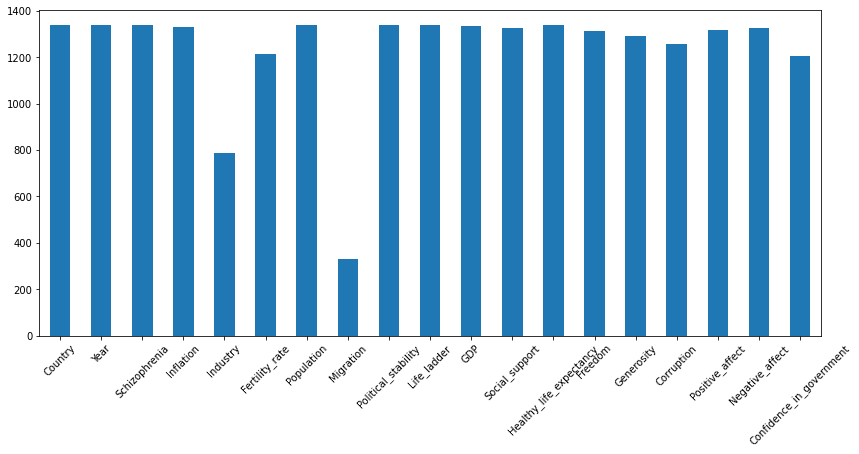

In [34]:
# count the number of records in each column to see the missing values
import pandas as pd
import matplotlib.pyplot as plt
count = data.describe().toPandas().iloc[0].drop('summary').astype(int)
count.plot.bar(rot=45, figsize = (14, 6))

In [35]:
data = data.drop('Industry', 'Migration')
data.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Schizophrenia: double (nullable = true)
 |-- Inflation: double (nullable = true)
 |-- Fertility_rate: double (nullable = true)
 |-- Population: double (nullable = true)
 |-- Political_stability: double (nullable = true)
 |-- Life_ladder: double (nullable = true)
 |-- GDP: double (nullable = true)
 |-- Social_support: double (nullable = true)
 |-- Healthy_life_expectancy: double (nullable = true)
 |-- Freedom: double (nullable = true)
 |-- Generosity: double (nullable = true)
 |-- Corruption: double (nullable = true)
 |-- Positive_affect: double (nullable = true)
 |-- Negative_affect: double (nullable = true)
 |-- Confidence_in_government: double (nullable = true)



<AxesSubplot:>

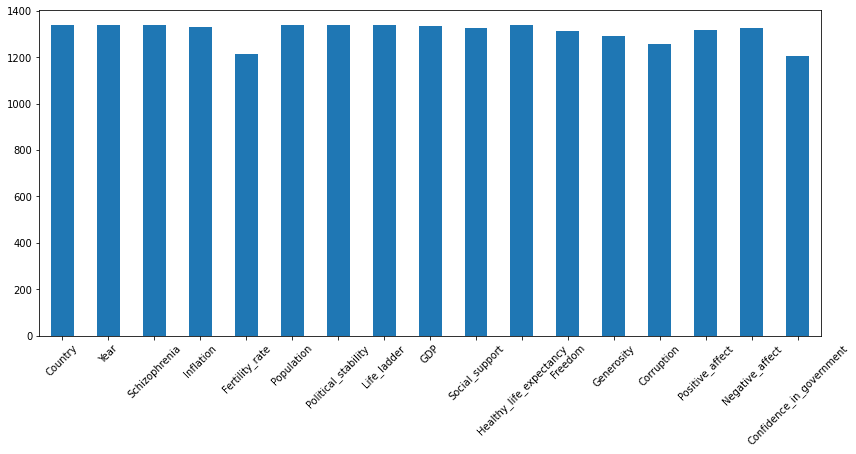

In [36]:
count = data.describe().toPandas().iloc[0].drop('summary').astype(int)
count.plot.bar(rot=45, figsize = (14, 6))

<AxesSubplot:>

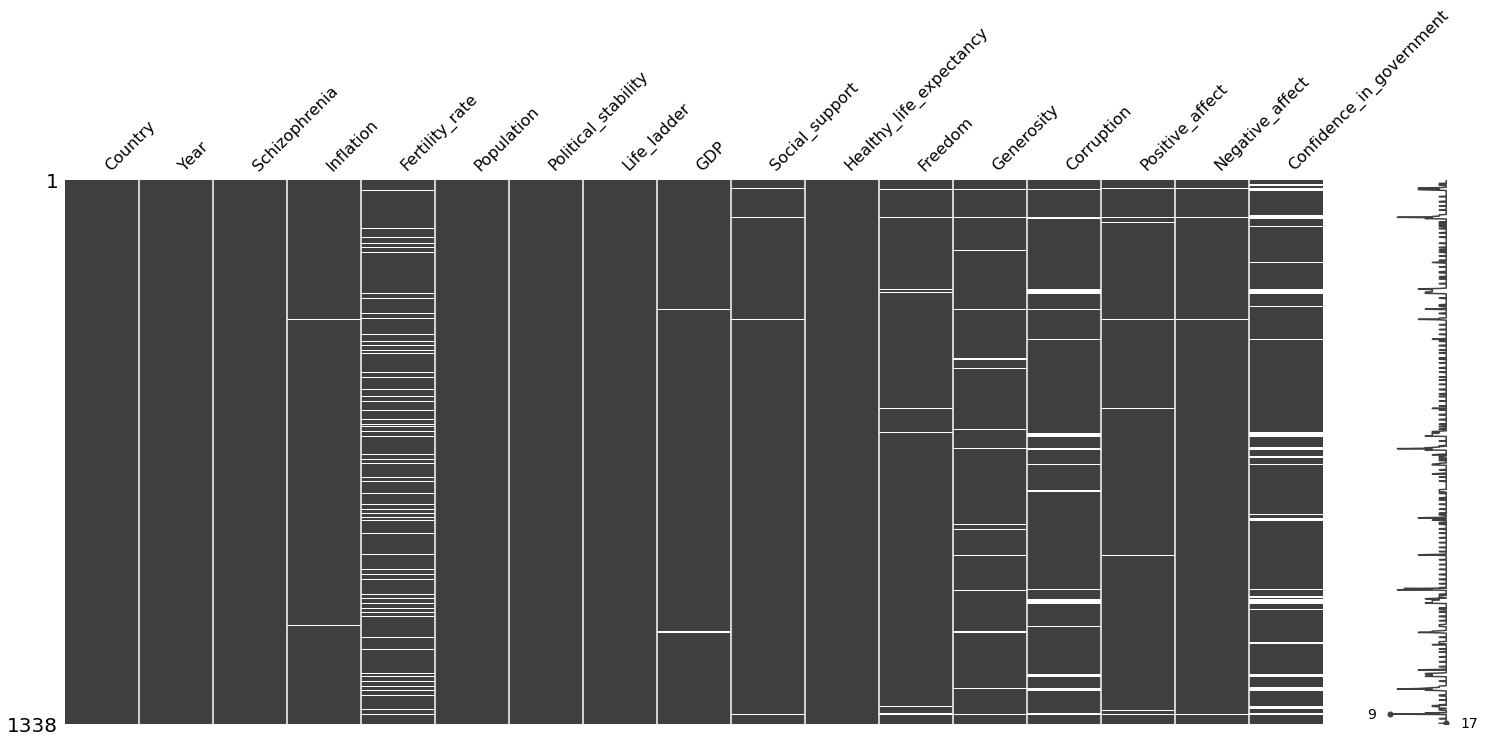

In [37]:
# check the distribution of missing values
import missingno as msno
msno.matrix(data.toPandas())

<AxesSubplot:>

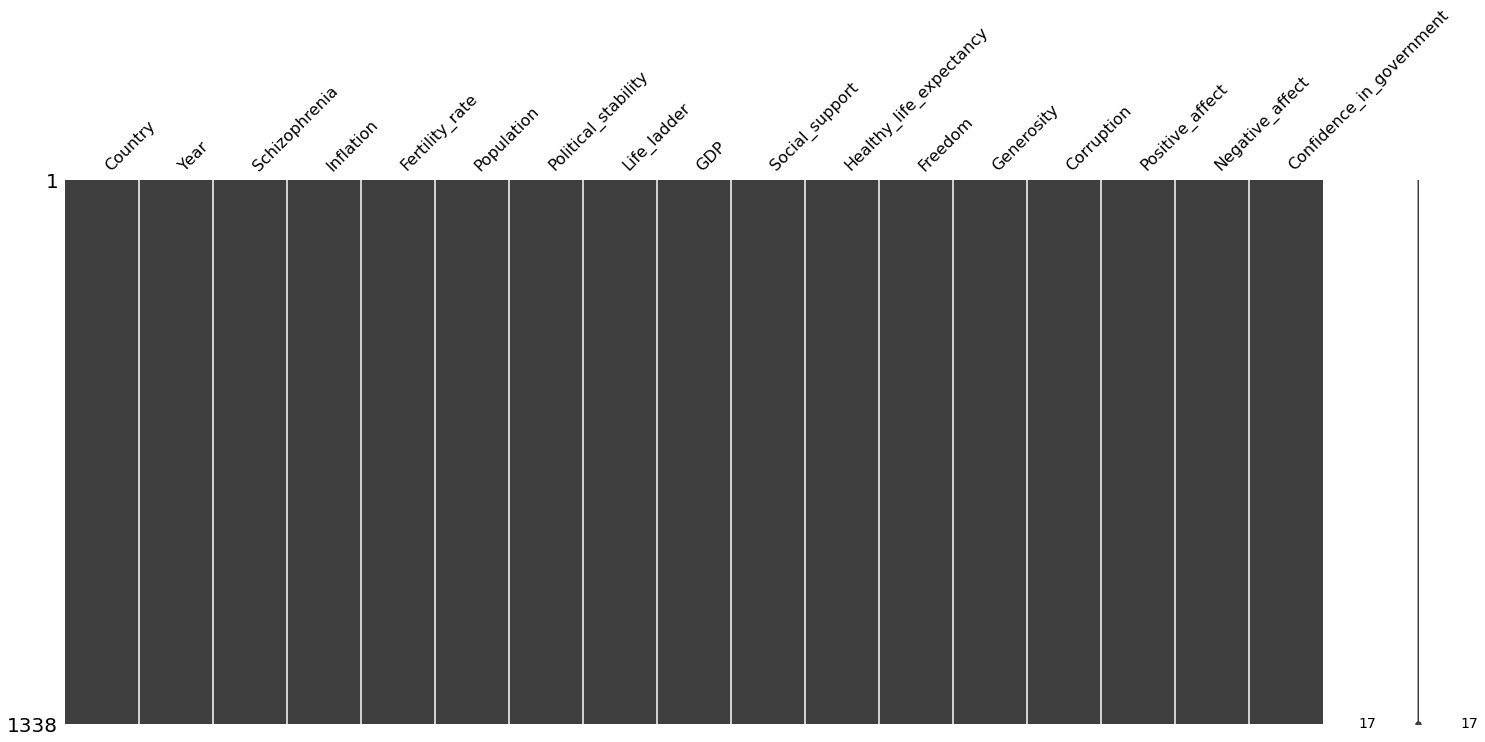

In [38]:
# calculate the mean value of each columns and impute the missing value with mean 
from pyspark.sql.functions import mean
data = data.fillna(data.select(mean('Schizophrenia')).collect()[0][0], subset=['Schizophrenia'])
data = data.fillna(data.select(mean('Inflation')).collect()[0][0], subset=['Inflation'])
data = data.fillna(data.select(mean('Fertility_rate')).collect()[0][0], subset=['Fertility_rate'])
data = data.fillna(data.select(mean('Population')).collect()[0][0], subset=['Population'])
data = data.fillna(data.select(mean('Political_stability')).collect()[0][0], subset=['Political_stability'])
data = data.fillna(data.select(mean('Social_support')).collect()[0][0], subset=['Social_support'])
data = data.fillna(data.select(mean('Freedom')).collect()[0][0], subset=['Freedom'])
data = data.fillna(data.select(mean('Generosity')).collect()[0][0], subset=['Generosity'])
data = data.fillna(data.select(mean('Corruption')).collect()[0][0], subset=['Corruption'])
data = data.fillna(data.select(mean('Positive_affect')).collect()[0][0], subset=['Positive_affect'])
data = data.fillna(data.select(mean('Confidence_in_government')).collect()[0][0], subset=['Confidence_in_government'])
data = data.fillna(data.select(mean('GDP')).collect()[0][0], subset=['GDP'])
data = data.fillna(data.select(mean('Negative_affect')).collect()[0][0], subset=['Negative_affect'])
msno.matrix(data.toPandas())

In [39]:
data = data.toPandas()

<AxesSubplot:>

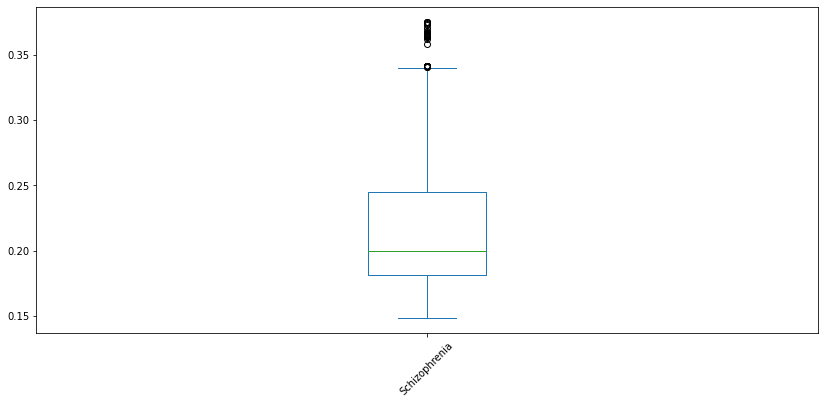

In [40]:
# boxplot
data['Schizophrenia'].plot.box(rot=45, figsize = (14, 6))

<AxesSubplot:>

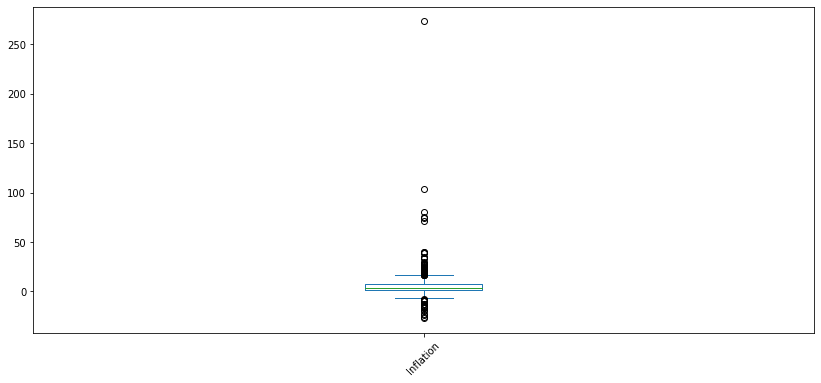

In [41]:
data['Inflation'].plot.box(rot=45, figsize = (14, 6))

<AxesSubplot:>

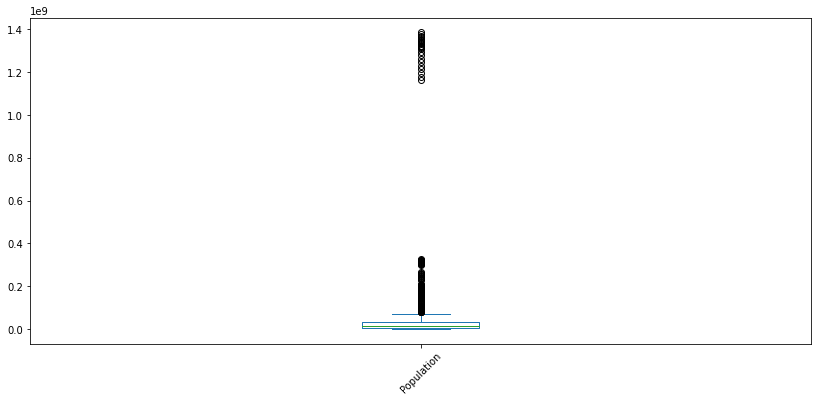

In [42]:
data['Population'].plot.box(rot=45, figsize = (14, 6))

<AxesSubplot:>

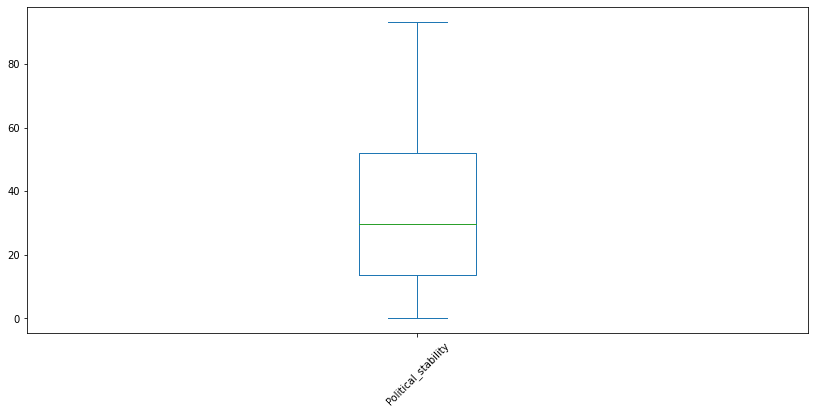

In [43]:
data['Political_stability'].plot.box(rot=45, figsize = (14, 6))

<AxesSubplot:>

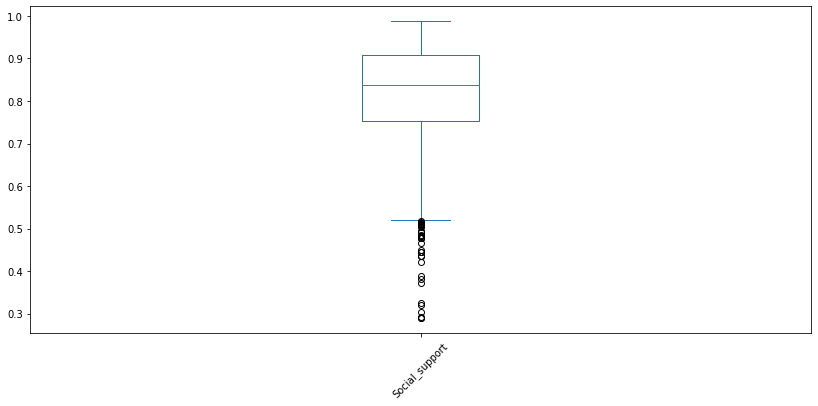

In [44]:
data['Social_support'].plot.box(rot=45, figsize = (14, 6))

<AxesSubplot:>

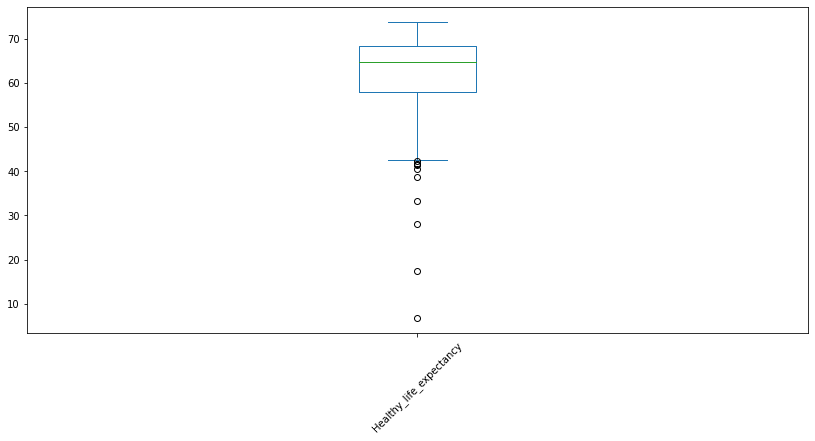

In [45]:
data['Healthy_life_expectancy'].plot.box(rot=45, figsize = (14, 6))

<AxesSubplot:>

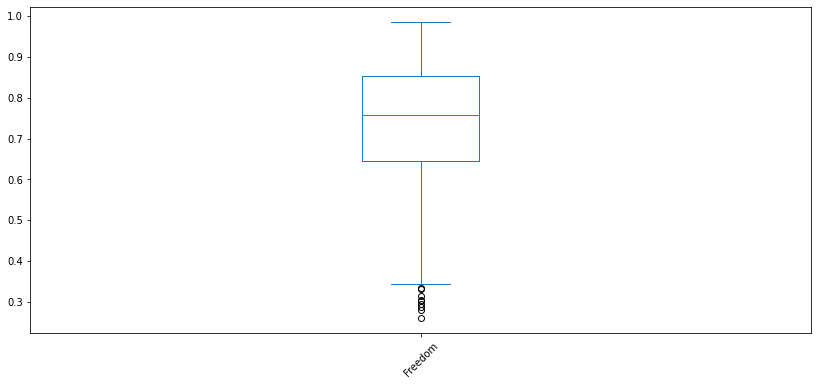

In [46]:
data['Freedom'].plot.box(rot=45, figsize = (14, 6))

In [47]:
data

,Country,Year,Schizophrenia,Inflation,Fertility_rate,Population,Political_stability,Life_ladder,GDP,Social_support,Healthy_life_expectancy,Freedom,Generosity,Corruption,Positive_affect,Negative_affect,Confidence_in_government
0,Afghanistan,2008,0.164639,2.179103,6.25400,27294031.0,0.00000,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,2009,0.164932,-2.107083,6.03800,28004331.0,0.00000,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,2010,0.165130,9.437795,5.81600,28803167.0,0.00000,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,2011,0.165272,10.561139,5.59500,29708599.0,0.00000,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,2012,0.165424,8.304761,5.38000,30696958.0,0.00000,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,Zimbabwe,2013,0.155670,2.805702,3.95700,15054506.0,17.06161,4.690188,7.755187,0.799274,48.799999,0.575884,-0.089405,0.830937,0.623596,0.182288,0.527755
1334,Zimbabwe,2014,0.155993,0.700921,3.90300,15411675.0,13.33333,4.184451,7.748009,0.765839,50.000000,0.642034,-0.058242,0.820217,0.661307,0.239111,0.566209
1335,Zimbabwe,2015,0.156465,0.898072,3.83600,15777451.0,16.66667,3.703191,7.746680,0.735800,51.200001,0.667193,-0.107365,0.810457,0.639002,0.178861,0.590012
1336,Zimbabwe,2016,0.157111,1.309977,3.76000,16150362.0,14.28571,3.735400,7.734831,0.768425,51.674999,0.732971,-0.078541,0.723612,0.685256,0.208555,0.699344


In [48]:
# get the average value of all years for each country
data_mean = data.groupby("Country").mean()
data_mean = data_mean.drop(columns=['Year'])
data_mean

,Schizophrenia,Inflation,Fertility_rate,Population,Political_stability,Life_ladder,GDP,Social_support,Healthy_life_expectancy,Freedom,Generosity,Corruption,Positive_affect,Negative_affect,Confidence_in_government
Country,,,,,,,,,,,,,,,
Afghanistan,0.165481,4.527821,5.146507,3.129194e+07,0.000000,3.806614,7.601773,0.517146,51.857500,0.544895,0.105552,0.826794,0.497312,0.301283,0.400442
Albania,0.199833,1.713365,1.794707,2.903061e+06,36.299245,4.988791,9.323349,0.723204,68.195501,0.626155,-0.100680,0.859691,0.555569,0.303256,0.432327
Algeria,0.197471,8.200652,2.867678,3.859009e+07,6.971714,5.555004,9.344610,0.806064,65.833332,0.604431,-0.122898,0.689387,0.563510,0.264745,0.485063
Angola,0.171298,8.077668,5.960750,2.555838e+07,21.828592,4.420299,8.985655,0.737973,52.150001,0.455957,-0.090508,0.867018,0.625734,0.351173,0.397389
Argentina,0.197575,24.199908,2.395506,4.189551e+07,34.361074,6.406131,10.050591,0.906080,66.462500,0.753122,-0.157877,0.844038,0.750714,0.273187,0.400587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,0.197493,7.675716,2.125423,3.391753e+06,62.725797,6.220598,9.893740,0.896942,67.199999,0.856150,-0.094844,0.580815,0.730869,0.263640,0.579989
Uzbekistan,0.185795,16.114275,2.442825,2.961542e+07,16.296689,5.721216,8.596716,0.930260,62.774545,0.890654,0.046385,0.556308,0.692250,0.147519,0.654851
Vietnam,0.240101,8.734743,2.012339,9.011188e+07,39.295347,5.293268,8.826811,0.826035,64.625000,0.838983,-0.000005,0.769337,0.598848,0.214098,0.727263


In [49]:
# create new feature "GDP_all"
data = data_mean
data['GDP_all'] = data['GDP'] * data['Population']
data

,Schizophrenia,Inflation,Fertility_rate,Population,Political_stability,Life_ladder,GDP,Social_support,Healthy_life_expectancy,Freedom,Generosity,Corruption,Positive_affect,Negative_affect,Confidence_in_government,GDP_all
Country,,,,,,,,,,,,,,,,
Afghanistan,0.165481,4.527821,5.146507,3.129194e+07,0.000000,3.806614,7.601773,0.517146,51.857500,0.544895,0.105552,0.826794,0.497312,0.301283,0.400442,2.378742e+08
Albania,0.199833,1.713365,1.794707,2.903061e+06,36.299245,4.988791,9.323349,0.723204,68.195501,0.626155,-0.100680,0.859691,0.555569,0.303256,0.432327,2.706625e+07
Algeria,0.197471,8.200652,2.867678,3.859009e+07,6.971714,5.555004,9.344610,0.806064,65.833332,0.604431,-0.122898,0.689387,0.563510,0.264745,0.485063,3.606094e+08
Angola,0.171298,8.077668,5.960750,2.555838e+07,21.828592,4.420299,8.985655,0.737973,52.150001,0.455957,-0.090508,0.867018,0.625734,0.351173,0.397389,2.296588e+08
Argentina,0.197575,24.199908,2.395506,4.189551e+07,34.361074,6.406131,10.050591,0.906080,66.462500,0.753122,-0.157877,0.844038,0.750714,0.273187,0.400587,4.210746e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,0.197493,7.675716,2.125423,3.391753e+06,62.725797,6.220598,9.893740,0.896942,67.199999,0.856150,-0.094844,0.580815,0.730869,0.263640,0.579989,3.355712e+07
Uzbekistan,0.185795,16.114275,2.442825,2.961542e+07,16.296689,5.721216,8.596716,0.930260,62.774545,0.890654,0.046385,0.556308,0.692250,0.147519,0.654851,2.545954e+08
Vietnam,0.240101,8.734743,2.012339,9.011188e+07,39.295347,5.293268,8.826811,0.826035,64.625000,0.838983,-0.000005,0.769337,0.598848,0.214098,0.727263,7.954005e+08


<AxesSubplot:ylabel='Frequency'>

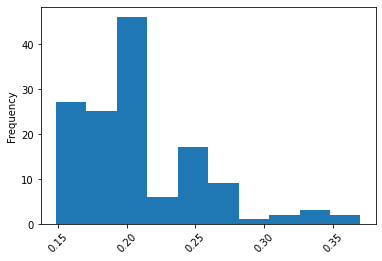

In [50]:
# check data distribution of all columns
data['Schizophrenia'].plot.hist(rot=45, figsize = (6, 4))

<AxesSubplot:ylabel='Frequency'>

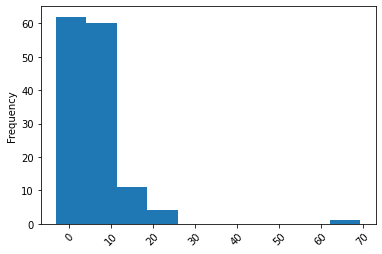

In [51]:
data['Inflation'].plot.hist(rot=45, figsize = (6, 4))

<AxesSubplot:ylabel='Frequency'>

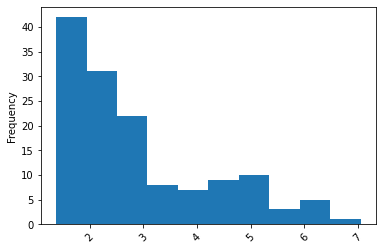

In [52]:
data['Fertility_rate'].plot.hist(rot=45, figsize = (6, 4))

<AxesSubplot:ylabel='Frequency'>

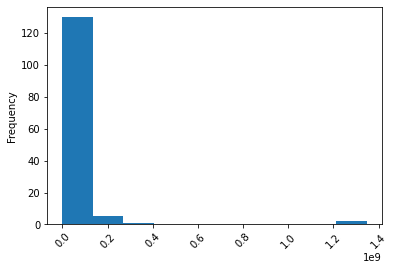

In [53]:
data['Population'].plot.hist(rot=45, figsize = (6, 4))  

<AxesSubplot:ylabel='Frequency'>

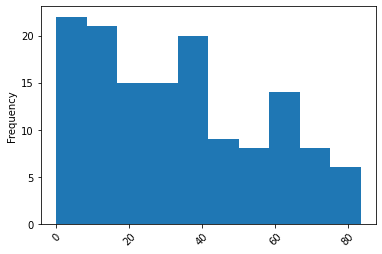

In [54]:
data['Political_stability'].plot.hist(rot=45, figsize = (6, 4))

<AxesSubplot:ylabel='Frequency'>

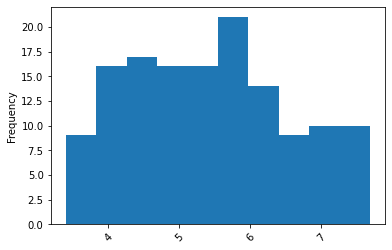

In [55]:
data['Life_ladder'].plot.hist(rot=45, figsize = (6, 4))

<AxesSubplot:ylabel='Frequency'>

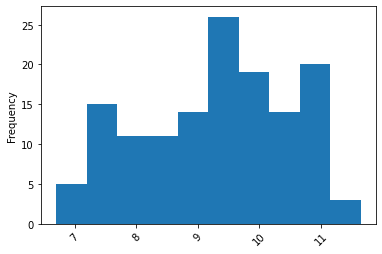

In [56]:
data['GDP'].plot.hist(rot=45, figsize = (6, 4))

<AxesSubplot:ylabel='Frequency'>

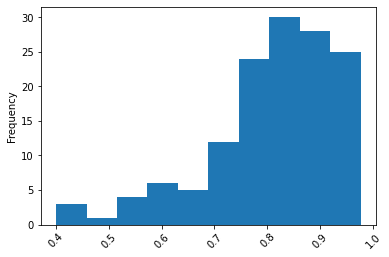

In [57]:
data['Social_support'].plot.hist(rot=45, figsize = (6, 4))

In [58]:
# perfomr data normalization
data_norm = (data - data.min()) / (data.max() - data.min())
data_norm
data = data_norm

In [59]:
data = spark.createDataFrame(data) 

In [60]:
# put all features in a feature vector of lm
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=['Inflation','Fertility_rate','Population','Political_stability','Life_ladder','GDP','Social_support','Healthy_life_expectancy','Freedom','Generosity','Corruption','Positive_affect','Negative_affect','Confidence_in_government','GDP_all'],
                           outputCol="features")
data_assmbled = assembler.transform(data).select('features','Schizophrenia')
data_assmbled.printSchema()

root
 |-- features: vector (nullable = true)
 |-- Schizophrenia: double (nullable = true)



In [61]:
# get r2 value from lm
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(labelCol='Schizophrenia')
lrm = lr.fit(data_assmbled)
r2 = lrm.evaluate(data_assmbled).r2
r2

23/10/08 04:00:30 WARN Instrumentation: [b94f69e5] regParam is zero, which might cause numerical instability and overfitting.
23/10/08 04:00:31 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/10/08 04:00:31 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
23/10/08 04:00:31 WARN InstanceBuilder$NativeLAPACK: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


0.7822630600817361

In [62]:
# calculate adjusted r2 
data_no = data_assmbled.count()
feature_no = len(lrm.coefficients)
adj_r2 = 1 - (1 - r2) * ((data_no - 1) / (data_no - feature_no - 1))
adj_r2

0.7554921248458839

In [63]:
# get the coef for all features
coef = lrm.coefficients
features = [x for x in data.columns if x != 'Schizophrenia']
feature_coef = list(zip(coef, features))
feature_coef

[(-0.17171354441421052, 'Inflation'),
 (-0.04829094003865403, 'Fertility_rate'),
 (-3.2802711442117767, 'Population'),
 (0.08428324839940686, 'Political_stability'),
 (0.07814205502932038, 'Life_ladder'),
 (0.13822294784073133, 'GDP'),
 (-0.050049955857019636, 'Social_support'),
 (0.3107872056375626, 'Healthy_life_expectancy'),
 (-0.06463198399497061, 'Freedom'),
 (0.32429828713076797, 'Generosity'),
 (-0.10875958812812943, 'Corruption'),
 (-0.06710804379946497, 'Positive_affect'),
 (0.00885285378417153, 'Negative_affect'),
 (0.030491982910757748, 'Confidence_in_government'),
 (3.9743467631458267, 'GDP_all')]

In [64]:
assembler = VectorAssembler(inputCols=['Inflation','Fertility_rate','Population','Political_stability','Life_ladder','GDP','Social_support','Healthy_life_expectancy','Freedom','Generosity','Corruption','Positive_affect','Confidence_in_government','GDP_all'],
                           outputCol="features")
data_assmbled2 = assembler.transform(data).select('features','Schizophrenia')
lrm2 = lr.fit(data_assmbled2)
r2 = lrm2.evaluate(data_assmbled2).r2
r2

23/10/08 04:00:32 WARN Instrumentation: [186e1456] regParam is zero, which might cause numerical instability and overfitting.


0.7822238868838524

In [65]:
data_no = data_assmbled2.count()
feature_no = len(lrm2.coefficients)
adj_r2 = 1 - (1 - r2) * ((data_no - 1) / (data_no - feature_no - 1))
adj_r2

0.7574363618137218

In [66]:
coef = lrm2.coefficients
features = [x for x in data.columns if x not in ['Schizophrenia','Negative_affect']]
feature_coef = list(zip(coef, features))
feature_coef

[(-0.171274277046327, 'Inflation'),
 (-0.04772378279804794, 'Fertility_rate'),
 (-3.2753299170807146, 'Population'),
 (0.0831469643979829, 'Political_stability'),
 (0.078503644263033, 'Life_ladder'),
 (0.14123377684845875, 'GDP'),
 (-0.053887565178019806, 'Social_support'),
 (0.3110960034875576, 'Healthy_life_expectancy'),
 (-0.06440745657817479, 'Freedom'),
 (0.3248216561924512, 'Generosity'),
 (-0.10641326025919136, 'Corruption'),
 (-0.06809484775555372, 'Positive_affect'),
 (0.02960855258477843, 'Confidence_in_government'),
 (3.96697011275427, 'GDP_all')]

In [67]:
assembler = VectorAssembler(inputCols=['Inflation','Fertility_rate','Population','Political_stability','Life_ladder','GDP','Social_support','Healthy_life_expectancy','Freedom','Generosity','Corruption','Positive_affect','GDP_all'],
                           outputCol="features")
data_assmbled3 = assembler.transform(data).select('features','Schizophrenia')
lrm3 = lr.fit(data_assmbled3)
r3 = lrm3.evaluate(data_assmbled3).r2
r3

23/10/08 04:00:33 WARN Instrumentation: [c7b56c53] regParam is zero, which might cause numerical instability and overfitting.


0.781828273532239

In [68]:
data_no = data_assmbled3.count()
feature_no = len(lrm3.coefficients)
adj_r3 = 1 - (1 - r3) * ((data_no - 1) / (data_no - feature_no - 1))
adj_r3

0.7589554312412641

In [69]:
coef = lrm3.coefficients
features = [x for x in data.columns if x not in ['Schizophrenia','Negative_affect','Confidence_in_government']]
feature_coef = list(zip(coef, features))
feature_coef

[(-0.16669330332668458, 'Inflation'),
 (-0.049883245794215415, 'Fertility_rate'),
 (-3.1880831746627365, 'Population'),
 (0.0835914966632481, 'Political_stability'),
 (0.06788711171402827, 'Life_ladder'),
 (0.13814451518238594, 'GDP'),
 (-0.05437211417687092, 'Social_support'),
 (0.30876170507573925, 'Healthy_life_expectancy'),
 (-0.05011567046026055, 'Freedom'),
 (0.32924264415355897, 'Generosity'),
 (-0.11847490810658602, 'Corruption'),
 (-0.06978067219197798, 'Positive_affect'),
 (3.8786812433331335, 'GDP_all')]

In [70]:
assembler = VectorAssembler(inputCols=['Inflation', 'Population','Political_stability','Life_ladder','GDP','Social_support','Healthy_life_expectancy','Freedom','Generosity','Corruption','Positive_affect','GDP_all'],
                           outputCol="features")
data_assmbled4 = assembler.transform(data).select('features','Schizophrenia')
lrm4 = lr.fit(data_assmbled4)
r4 = lrm4.evaluate(data_assmbled4).r2
r4

23/10/08 04:00:34 WARN Instrumentation: [586a84ef] regParam is zero, which might cause numerical instability and overfitting.


0.7809665778379054

In [71]:
data_no = data_assmbled4.count()
feature_no = len(lrm4.coefficients)
adj_r4 = 1 - (1 - r4) * ((data_no - 1) / (data_no - feature_no - 1))
adj_r4

0.7599393693103442

In [72]:
coef = lrm4.coefficients
features = [x for x in data.columns if x not in ['Schizophrenia','Negative_affect','Confidence_in_government','Fertility_rate']]
feature_coef = list(zip(coef, features))
feature_coef

[(-0.16577421995567374, 'Inflation'),
 (-3.1769817591555007, 'Population'),
 (0.08794801397435437, 'Political_stability'),
 (0.06736823276471479, 'Life_ladder'),
 (0.15630207704040613, 'GDP'),
 (-0.04776803148492167, 'Social_support'),
 (0.33235345774634045, 'Healthy_life_expectancy'),
 (-0.04455809510292645, 'Freedom'),
 (0.3287210935079053, 'Generosity'),
 (-0.10983723851259847, 'Corruption'),
 (-0.07939359608467504, 'Positive_affect'),
 (3.8772734578556514, 'GDP_all')]

In [73]:
assembler = VectorAssembler(inputCols=['Inflation', 'Population','Political_stability','Life_ladder','GDP','Healthy_life_expectancy','Generosity','Corruption','Positive_affect','GDP_all'],
                           outputCol="features")
data_assmbled5 = assembler.transform(data).select('features','Schizophrenia')
lrm5 = lr.fit(data_assmbled5)
r5 = lrm5.evaluate(data_assmbled5).r2
r5

23/10/08 04:00:35 WARN Instrumentation: [abb5aa48] regParam is zero, which might cause numerical instability and overfitting.


0.7795296986283151

In [74]:
data_no = data_assmbled5.count()
feature_no = len(lrm5.coefficients)
adj_r5 = 1 - (1 - r5) * ((data_no - 1) / (data_no - feature_no - 1))
adj_r5

0.7621698323785762

In [75]:
coef = lrm5.coefficients
features = [x for x in data.columns if x not in ['Schizophrenia','Social_support','Freedom','Negative_affect','Confidence_in_government','Fertility_rate']]
feature_coef = list(zip(coef, features))
feature_coef

[(-0.16423094145872955, 'Inflation'),
 (-3.1911848140360553, 'Population'),
 (0.07472226210923427, 'Political_stability'),
 (0.05080715251304373, 'Life_ladder'),
 (0.15045592798241514, 'GDP'),
 (0.3219113012577754, 'Healthy_life_expectancy'),
 (0.32617369503328947, 'Generosity'),
 (-0.11009986745652293, 'Corruption'),
 (-0.10557185977700297, 'Positive_affect'),
 (3.8913912269354807, 'GDP_all')]

In [76]:
data_final = data_assmbled5 # take data_assmbled5 as the final data for further analysis
lrm = lr.fit(data_final)
coef = lrm.coefficients
features = [x for x in data.columns if x not in ['Schizophrenia','Social_support','Freedom','Negative_affect','Confidence_in_government','Fertility_rate']]
feature_coef = list(zip(coef, features))
feature_coef

23/10/08 04:00:36 WARN Instrumentation: [8750b002] regParam is zero, which might cause numerical instability and overfitting.


[(-0.16423094145872955, 'Inflation'),
 (-3.1911848140360553, 'Population'),
 (0.07472226210923427, 'Political_stability'),
 (0.05080715251304373, 'Life_ladder'),
 (0.15045592798241514, 'GDP'),
 (0.3219113012577754, 'Healthy_life_expectancy'),
 (0.32617369503328947, 'Generosity'),
 (-0.11009986745652293, 'Corruption'),
 (-0.10557185977700297, 'Positive_affect'),
 (3.8913912269354807, 'GDP_all')]

In [77]:
# convert the feature/coef list to dataframe
from pyspark.sql import Row
from pyspark.sql.types import StructType, StructField, FloatType , StringType

rows = [Row(coef=float(row[0]), feature=row[1]) for row in feature_coef]
schema = StructType([    
    StructField("coef", FloatType (), True),
    StructField("feature", StringType(), True),
])
features = spark.createDataFrame(rows, schema=schema)

In [78]:
topFeatures = features.filter(~col("feature").isin(["Political_stability","Life_ladder","GDP","Corruption","Positive_affect"])) 
topFeatures.show()

+-----------+--------------------+
|       coef|             feature|
+-----------+--------------------+
|-0.16423094|           Inflation|
| -3.1911848|          Population|
|  0.3219113|Healthy_life_expe...|
|  0.3261737|          Generosity|
|  3.8913913|             GDP_all|
+-----------+--------------------+



In [79]:
topFeatures_df = topFeatures.toPandas()

<AxesSubplot:title={'center':'Schizophrenia'}>

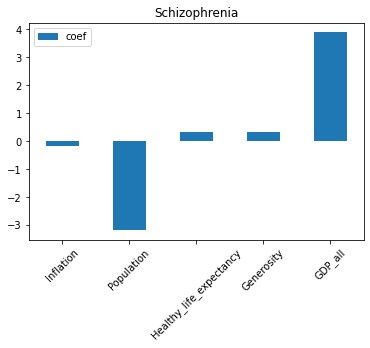

In [80]:
topFeatures_df.plot(x='feature', y='coef', kind='bar', rot = 45, title = 'Schizophrenia', xlabel = '')

In [81]:
happy1 = happy.toPandas()

In [82]:
for i in range(len(topFeatures_df)):
    if topFeatures_df.iloc[i,1] in happy1.columns:
        topFeatures_df.loc[i,'happiness'] = 'Happiness Report Indicator'
    else:
        topFeatures_df.loc[i,'happiness'] = 'Not Happiness Report Indicator'

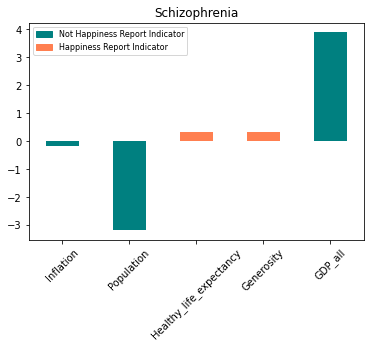

In [83]:
import matplotlib.pyplot as plt

colors = {'Happiness Report Indicator':'coral', 'Not Happiness Report Indicator':'teal'}

topFeatures_df.plot(x = 'feature', y = 'coef', kind='bar', color = [colors[i] for i in topFeatures_df['happiness']], rot = 45, title = 'Schizophrenia', xlabel = '')
labels = topFeatures_df['happiness'].unique()
handles = [plt.Rectangle((0,0),1,1, color = colors[i]) for i in labels]
plt.legend(handles, labels, fontsize=8)
plt.show()